Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step #5 A = [2.2386572]
Loss = [59.080757]
Step #10 A = [3.69598]
Loss = [40.753323]
Step #15 A = [4.8792524]
Loss = [24.442884]
Step #20 A = [5.826052]
Loss = [25.51282]
Step #25 A = [6.6134744]
Loss = [11.969551]
Step #30 A = [7.208485]
Loss = [8.244233]
Step #35 A = [7.690838]
Loss = [3.7426362]
Step #40 A = [8.125685]
Loss = [3.1079757]
Step #45 A = [8.516127]
Loss = [3.9746535]
Step #50 A = [8.746699]
Loss = [4.22519]
Step #55 A = [9.026887]
Loss = [3.2437372]
Step #60 A = [9.212083]
Loss = [4.7294745]
Step #65 A = [9.287405]
Loss = [0.36239052]
Step #70 A = [9.374039]
Loss = [1.2503357]
Step #75 A = [9.503296]
Loss = [1.6062998]
Step #80 A = [9.684415]
Loss = [0.9870967]
Step #85 A = [9.725016]
Loss = [0.16187513]
Step #90 A = [9.812017]
Loss = [0.2268501]
Step #95 A = [9.76447]
Loss = [0.4347681]
Step #100 A = [9.837307]
Loss = [1.6547289]
Step #5 A = [[1.0333993]]
Loss = 79.30982
Step #10 A = [[2.6873584]

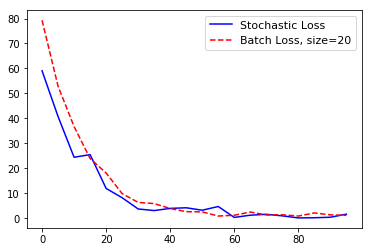

In [2]:
# Batch and Stochastic Training
#----------------------------------
#
#  This python function illustrates two different training methods:
#  batch and stochastic training.  For each model, we will use
#  a regression model that predicts one model variable.

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# We will implement a regression example in stochastic and batch training

# Stochastic Training:
# Create graph
sess = tf.Session()

# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

# Add operation to graph
my_output = tf.multiply(x_data, A)

# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

# Initialize variables
init = tf.initialize_all_variables()
sess.run(init)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)
        

# Batch Training:
# Re-initialize graph
ops.reset_default_graph()
sess = tf.Session()

# Declare batch size
batch_size = 20

# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

# Initialize variables
init = tf.initialize_all_variables()
sess.run(init)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)
        
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()